In [1]:
import tensorflow as tf
import numpy as np
import time

# Define the Gaussian function in TensorFlow
def gaussian_tf(x, sigma=0.447, mu=0.0):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * tf.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Compute the derivative using TensorFlow's autodiff
def compute_derivative_tf(x, sigma=0.447, mu=0.0):
    with tf.GradientTape() as tape:
        tape.watch(x)
        f = gaussian_tf(x, sigma, mu)
    df_dx = tape.gradient(f, x)
    return df_dx

# Measure the runtime on CPU/GPU
def measure_runtime_tf(runs=10, device='/CPU:0'):
    x = tf.constant(np.linspace(-5, 5, 1000), dtype=tf.float32)
    times = []
    for _ in range(runs):
        with tf.device(device):
            start_time = time.time()
            compute_derivative_tf(x)
            times.append(time.time() - start_time)
    return np.mean(times), np.std(times)

# Run the measurement on CPU and GPU
cpu_mean, cpu_std = measure_runtime_tf(runs=10, device='/CPU:0')
gpu_mean, gpu_std = measure_runtime_tf(runs=10, device='/GPU:0')

print(f"TensorFlow CPU: Mean runtime = {cpu_mean:.6f} s, Std = {cpu_std:.6f} s")
print(f"TensorFlow GPU: Mean runtime = {gpu_mean:.6f} s, Std = {gpu_std:.6f} s")


TensorFlow CPU: Mean runtime = 0.007855 s, Std = 0.010293 s
TensorFlow GPU: Mean runtime = 0.003241 s, Std = 0.003363 s


In [1]:
import torch
import numpy as np
import time

# Define the Gaussian function in PyTorch
def gaussian_torch(x, sigma=0.447, mu=0.0):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * torch.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Compute the derivative using PyTorch's autodiff
def compute_derivative_torch(x, sigma=0.447, mu=0.0):
    x = x.requires_grad_(True)
    f = gaussian_torch(x, sigma, mu)
    f.backward(torch.ones_like(x))
    return x.grad

# Measure the runtime on CPU/GPU
def measure_runtime_torch(runs=10, device='cpu'):
    x = torch.linspace(-5, 5, 1000, device=device)
    times = []
    for _ in range(runs):
        start_time = time.time()
        compute_derivative_torch(x)
        times.append(time.time() - start_time)
    return np.mean(times), np.std(times)

# Run the measurement on CPU and GPU
cpu_mean, cpu_std = measure_runtime_torch(runs=10, device='cpu')
gpu_mean, gpu_std = measure_runtime_torch(runs=10, device='cuda')

print(f"PyTorch CPU: Mean runtime = {cpu_mean:.6f} s, Std = {cpu_std:.6f} s")
print(f"PyTorch GPU: Mean runtime = {gpu_mean:.6f} s, Std = {gpu_std:.6f} s")


PyTorch CPU: Mean runtime = 0.007651 s, Std = 0.020571 s
PyTorch GPU: Mean runtime = 0.001178 s, Std = 0.002660 s


In [2]:
import tensorflow as tf
import numpy as np
import time

# Define the function f(x) in TensorFlow
def f_tf(x):
    return tf.exp(-x**2)

# Compute the second-order derivative using TensorFlow's autodiff
def second_order_derivative_tf(x):
    with tf.GradientTape() as tape2:
        tape2.watch(x)
        with tf.GradientTape() as tape1:
            tape1.watch(x)
            f = f_tf(x)
        df_dx = tape1.gradient(f, x)
    d2f_dx2 = tape2.gradient(df_dx, x)
    return d2f_dx2

# Measure runtime for 10000 points
def measure_runtime_tf():
    x = tf.constant(np.linspace(-5, 5, 10000), dtype=tf.float32)
    start_time = time.time()
    d2f_dx2 = second_order_derivative_tf(x)
    runtime = time.time() - start_time
    return d2f_dx2.numpy(), runtime

# Calculate the exact second derivative for validation
def exact_second_derivative(x):
    return (4 * x**2 - 2) * np.exp(-x**2)

# Run and validate
d2f_dx2_tf, runtime_tf = measure_runtime_tf()
x_points = np.linspace(-5, 5, 10000)
exact_d2f_dx2 = exact_second_derivative(x_points)

# Compare the results
print(f"TensorFlow Runtime: {runtime_tf:.6f} seconds")
print(f"Maximum absolute error: {np.max(np.abs(d2f_dx2_tf - exact_d2f_dx2)):.6e}")


TensorFlow Runtime: 0.016414 seconds
Maximum absolute error: 2.156057e-07


In [3]:
import torch
import numpy as np
import time

# Define the function f(x) in PyTorch
def f_torch(x):
    return torch.exp(-x**2)

# Compute the second-order derivative using PyTorch's autodiff
def second_order_derivative_torch(x):
    x.requires_grad_(True)
    f = f_torch(x)
    df_dx = torch.autograd.grad(f, x, torch.ones_like(x), create_graph=True)[0]
    d2f_dx2 = torch.autograd.grad(df_dx, x, torch.ones_like(x))[0]
    return d2f_dx2

# Measure runtime for 10000 points
def measure_runtime_torch():
    x = torch.linspace(-5, 5, 10000)
    start_time = time.time()
    d2f_dx2 = second_order_derivative_torch(x)
    runtime = time.time() - start_time
    return d2f_dx2.detach().numpy(), runtime

# Run and validate
d2f_dx2_torch, runtime_torch = measure_runtime_torch()
x_points = np.linspace(-5, 5, 10000)
exact_d2f_dx2 = exact_second_derivative(x_points)

# Compare the results
print(f"PyTorch Runtime: {runtime_torch:.6f} seconds")
print(f"Maximum absolute error: {np.max(np.abs(d2f_dx2_torch - exact_d2f_dx2)):.6e}")


PyTorch Runtime: 0.014382 seconds
Maximum absolute error: 1.624304e-06


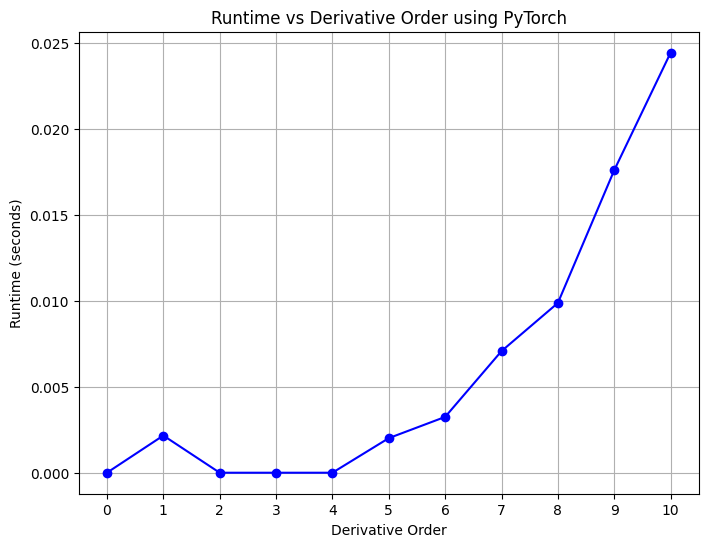

Order 0: Runtime = 0.000000 seconds
Order 1: Runtime = 0.002161 seconds
Order 2: Runtime = 0.000000 seconds
Order 3: Runtime = 0.000000 seconds
Order 4: Runtime = 0.000000 seconds
Order 5: Runtime = 0.002009 seconds
Order 6: Runtime = 0.003244 seconds
Order 7: Runtime = 0.007067 seconds
Order 8: Runtime = 0.009865 seconds
Order 9: Runtime = 0.017581 seconds
Order 10: Runtime = 0.024409 seconds


In [22]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt

# Define the function f(x) in PyTorch
def f_torch(x):
    return torch.exp(-x**2)

# Compute the nth-order derivative using PyTorch's autodiff
def nth_order_derivative_torch(x, n):
    x.requires_grad_(True)
    f = f_torch(x)
    for _ in range(n):
        grad = torch.autograd.grad(f, x, torch.ones_like(x), create_graph=True)[0]
        f = grad
    return f

# Measure runtime for nth-order derivative for 10000 points
def measure_runtime_torch(n):
    x = torch.linspace(-5, 5, 10000, requires_grad=True)
    start_time = time.time()
    nth_order_derivative_torch(x, n)
    runtime = time.time() - start_time
    return runtime

# Measure runtime for orders 0 to 3
orders = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
runtimes = [measure_runtime_torch(n) for n in orders]

# Plot the runtime against the derivative order
plt.figure(figsize=(8, 6))
plt.plot(orders, runtimes, marker='o', linestyle='-', color='b')
plt.title("Runtime vs Derivative Order using PyTorch")
plt.xlabel("Derivative Order")
plt.ylabel("Runtime (seconds)")
plt.xticks(orders)
plt.grid(True)
plt.show()

# Print the runtimes for reference
for order, runtime in zip(orders, runtimes):
    print(f"Order {order}: Runtime = {runtime:.6f} seconds")
